# Exercícios Análise de Regressão

-----

## Heterocedasticidade e Linearização

-----

### 1 - Identificando Heterocedasticidade

I. Criar um conjunto de dados hipotético com uma variável independente (X) 

II. Use X para criar uma série exponencial de Y (Y = aebX)

III. Ajuste um modelo de regressão linear para prever Y com base em X.	

IV. Plote o gráfico de dispersão dos resíduos do modelo (resíduos vs. valores ajustados).

V. Visualize os resíduos em relação a X. Observe qualquer padrão nas variações dos resíduos. Isso sugere a presença de heterocedasticidade?



In [4]:
# Importe as bibliotecas necessárias
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

#### I. Criar um conjunto de dados hipotético com uma variável independente (X) 

In [20]:
# Criando um conjunto de dados Fake
np.random.seed(11102023)
X = 25 * np.random.rand(100, 1)  # Variável independente X
Y = 27 * X + np.random.randn(100, 1)  # Variável dependente Y com ruído
X = [x[0] for x in X] # Converte em uma lista simples
Y = [y[0] for y in Y] # Converte em uma lista simples

data = {
    'gastos': X,
    'renda': Y
}


# Converter para um DataFrame do pandas
df = pd.DataFrame(data)
print(df)

# Converter para um DataFrame do pandas utilizando log
df_log = np.log(pd.DataFrame(data))
print(df_log)


       gastos       renda
0   16.689197  449.144623
1    6.600374  178.345366
2    9.526663  256.356393
3   13.511918  365.223180
4    5.251905  141.678121
..        ...         ...
95   5.896881  158.269969
96  21.962838  592.096026
97   3.861052  103.278582
98   9.925934  268.606170
99  17.585201  473.567327

[100 rows x 2 columns]
      gastos     renda
0   2.814762  6.107345
1   1.887126  5.183722
2   2.254095  5.546569
3   2.603572  5.900509
4   1.658591  4.953558
..       ...       ...
95  1.774424  5.064302
96  3.089352  6.383669
97  1.350940  4.637430
98  2.295151  5.593246
99  2.867058  6.160294

[100 rows x 2 columns]


                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6677.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           5.82e-92
Time:                        19:49:29   Log-Likelihood:                 54.925
No. Observations:                 100   AIC:                            -105.9
Df Residuals:                      98   BIC:                            -100.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7014      0.072    -51.277      0.0

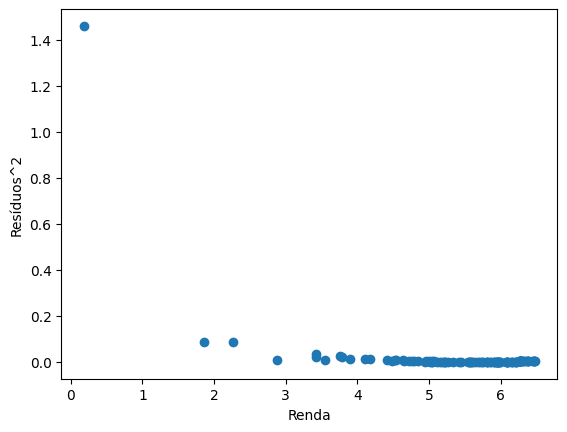

In [21]:
# Importar a biblioteca statsmodels.api como sm para realizar análises estatísticas
import statsmodels.api as sm

#Importar biblioteca matplotlib para plotagem de dados
import matplotlib.pyplot as plt

# Definir a variável alvo (target) como 'gastos' do DataFrame df
target = df_log.gastos

# Definir as características (features) como todas as colunas do DataFrame df, exceto 'gastos'
features = df_log.drop("gastos", axis=1)

# Adicionar uma constante (intercept) às características. Isso é necessário para a regressão linear.
features = sm.add_constant(features)

# Ajustar um modelo de regressão linear ordinária (OLS) com a variável alvo e as características
fit = sm.OLS(target, features).fit()

# Imprimir um resumo estatístico do modelo ajustado
print(fit.summary())

plt.scatter(df_log.renda, fit.resid ** 2)
plt.ylabel('Resíduos^2')
plt.xlabel('Renda')
plt.show()
plt.show()